# POD-Galerkin models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.io as sio
from scipy import linalg

import matplotlib as mpl
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif')
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', labelsize=20)
mpl.rc('axes', titlesize=20)
mpl.rc('figure', figsize=(6, 4))
%config InlineBackend.figure_format = 'retina'

mpl_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

import closure as cls
import nekflows

In [2]:
flow = nekflows.LidDrivenCavity(field_path=f'{nekflows.default_case_dir}/lid2d/16k/pod_modes')

# Flow field plot

In [3]:
unsteady_dir = '/srv/cfd/Nek5000/run/lid2d/20k/unsteady'

# case_dir = f'{nekflows.default_case_dir}/mix/long_domain/m2/'
vort = flow.get_vorticity(f'{unsteady_dir}/cav0.restart')
field = flow.interp(vort)

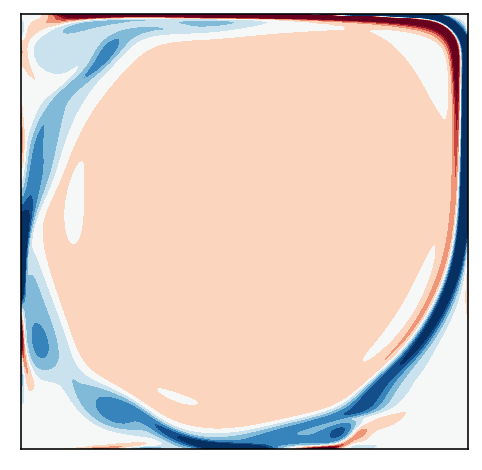

In [5]:
# cm = 'RdBu'
# # cm = sns.color_palette("vlag_r", as_cmap=True)
# plt.figure(figsize=(12, 5))
# clim=(-0.5, 0.5)
# levels = np.linspace(*clim, 20)
plt.figure(figsize=(4, 4))
flow.plot_field(field)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.show()

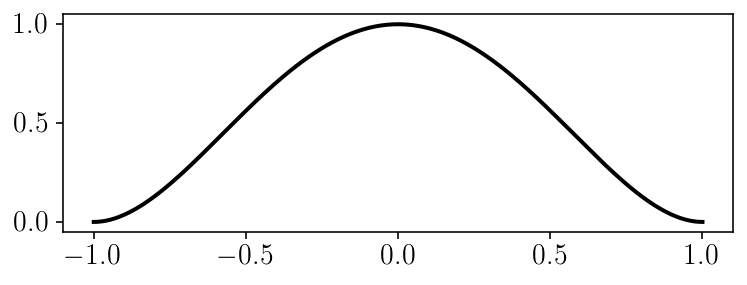

In [12]:
plt.figure(figsize=(6, 2))
plt.plot(flow.x, (1 - flow.x**2)**2, c='k', lw=2)
plt.show()

# Load POD coefficients

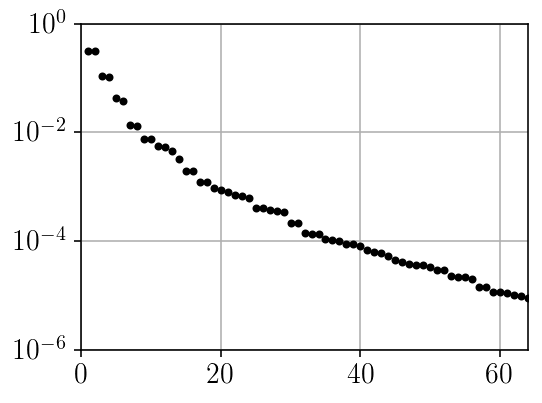

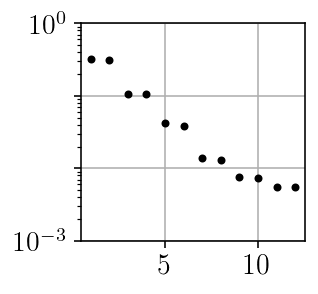

In [24]:
svs = np.loadtxt(f'{flow.field_path}/eigvals.dat')

plt.figure(figsize=(4, 3))
plt.plot(1+np.arange(len(svs)), svs/sum(svs), 'k.')
plt.gca().set_yscale('log')
plt.gca().set_xlim([0, 64])
plt.gca().set_ylim([1e-6, 1e0])
plt.grid()
plt.show()

plt.figure(figsize=(2, 2))
plt.plot(1+np.arange(len(svs)), svs/sum(svs), 'k.')
plt.gca().set_yscale('log')
plt.gca().set_xlim([0.5, 12.5])
plt.gca().set_ylim([1e-3, 1e0])
plt.grid()
plt.gca().set_yticks([1e-3, 1e-2, 1e-1, 1e0])
plt.gca().set_yticklabels(['$10^{-3}$', '', '', '$10^{0}$'])
plt.show()

In [14]:
t, a = flow.get_coeffs()

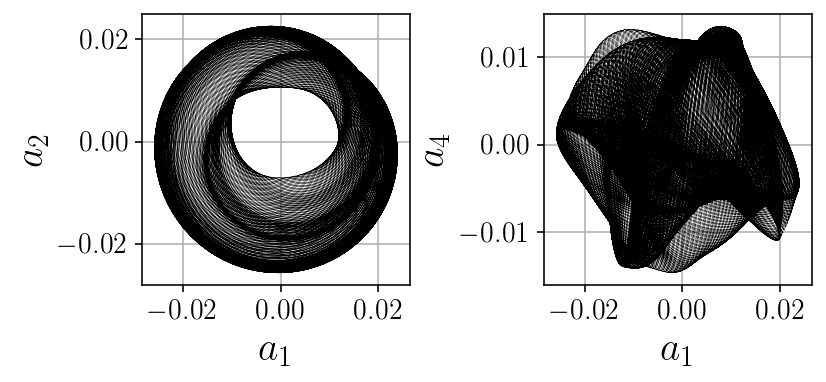

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(6, 2.5))
ax = axs.ravel()
plt_pairs = [
    (0, 1),
    (0, 3)
]

for i in range(len(ax)):
    x_idx, y_idx = plt_pairs[i]
    ax[i].plot(a[:, x_idx], a[:, y_idx], 'k', lw=0.1)
    ax[i].grid()
    ax[i].set_xlabel(f'$a_{{{x_idx+1}}}$')
    ax[i].set_ylabel(f'$a_{{{y_idx+1}}}$')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

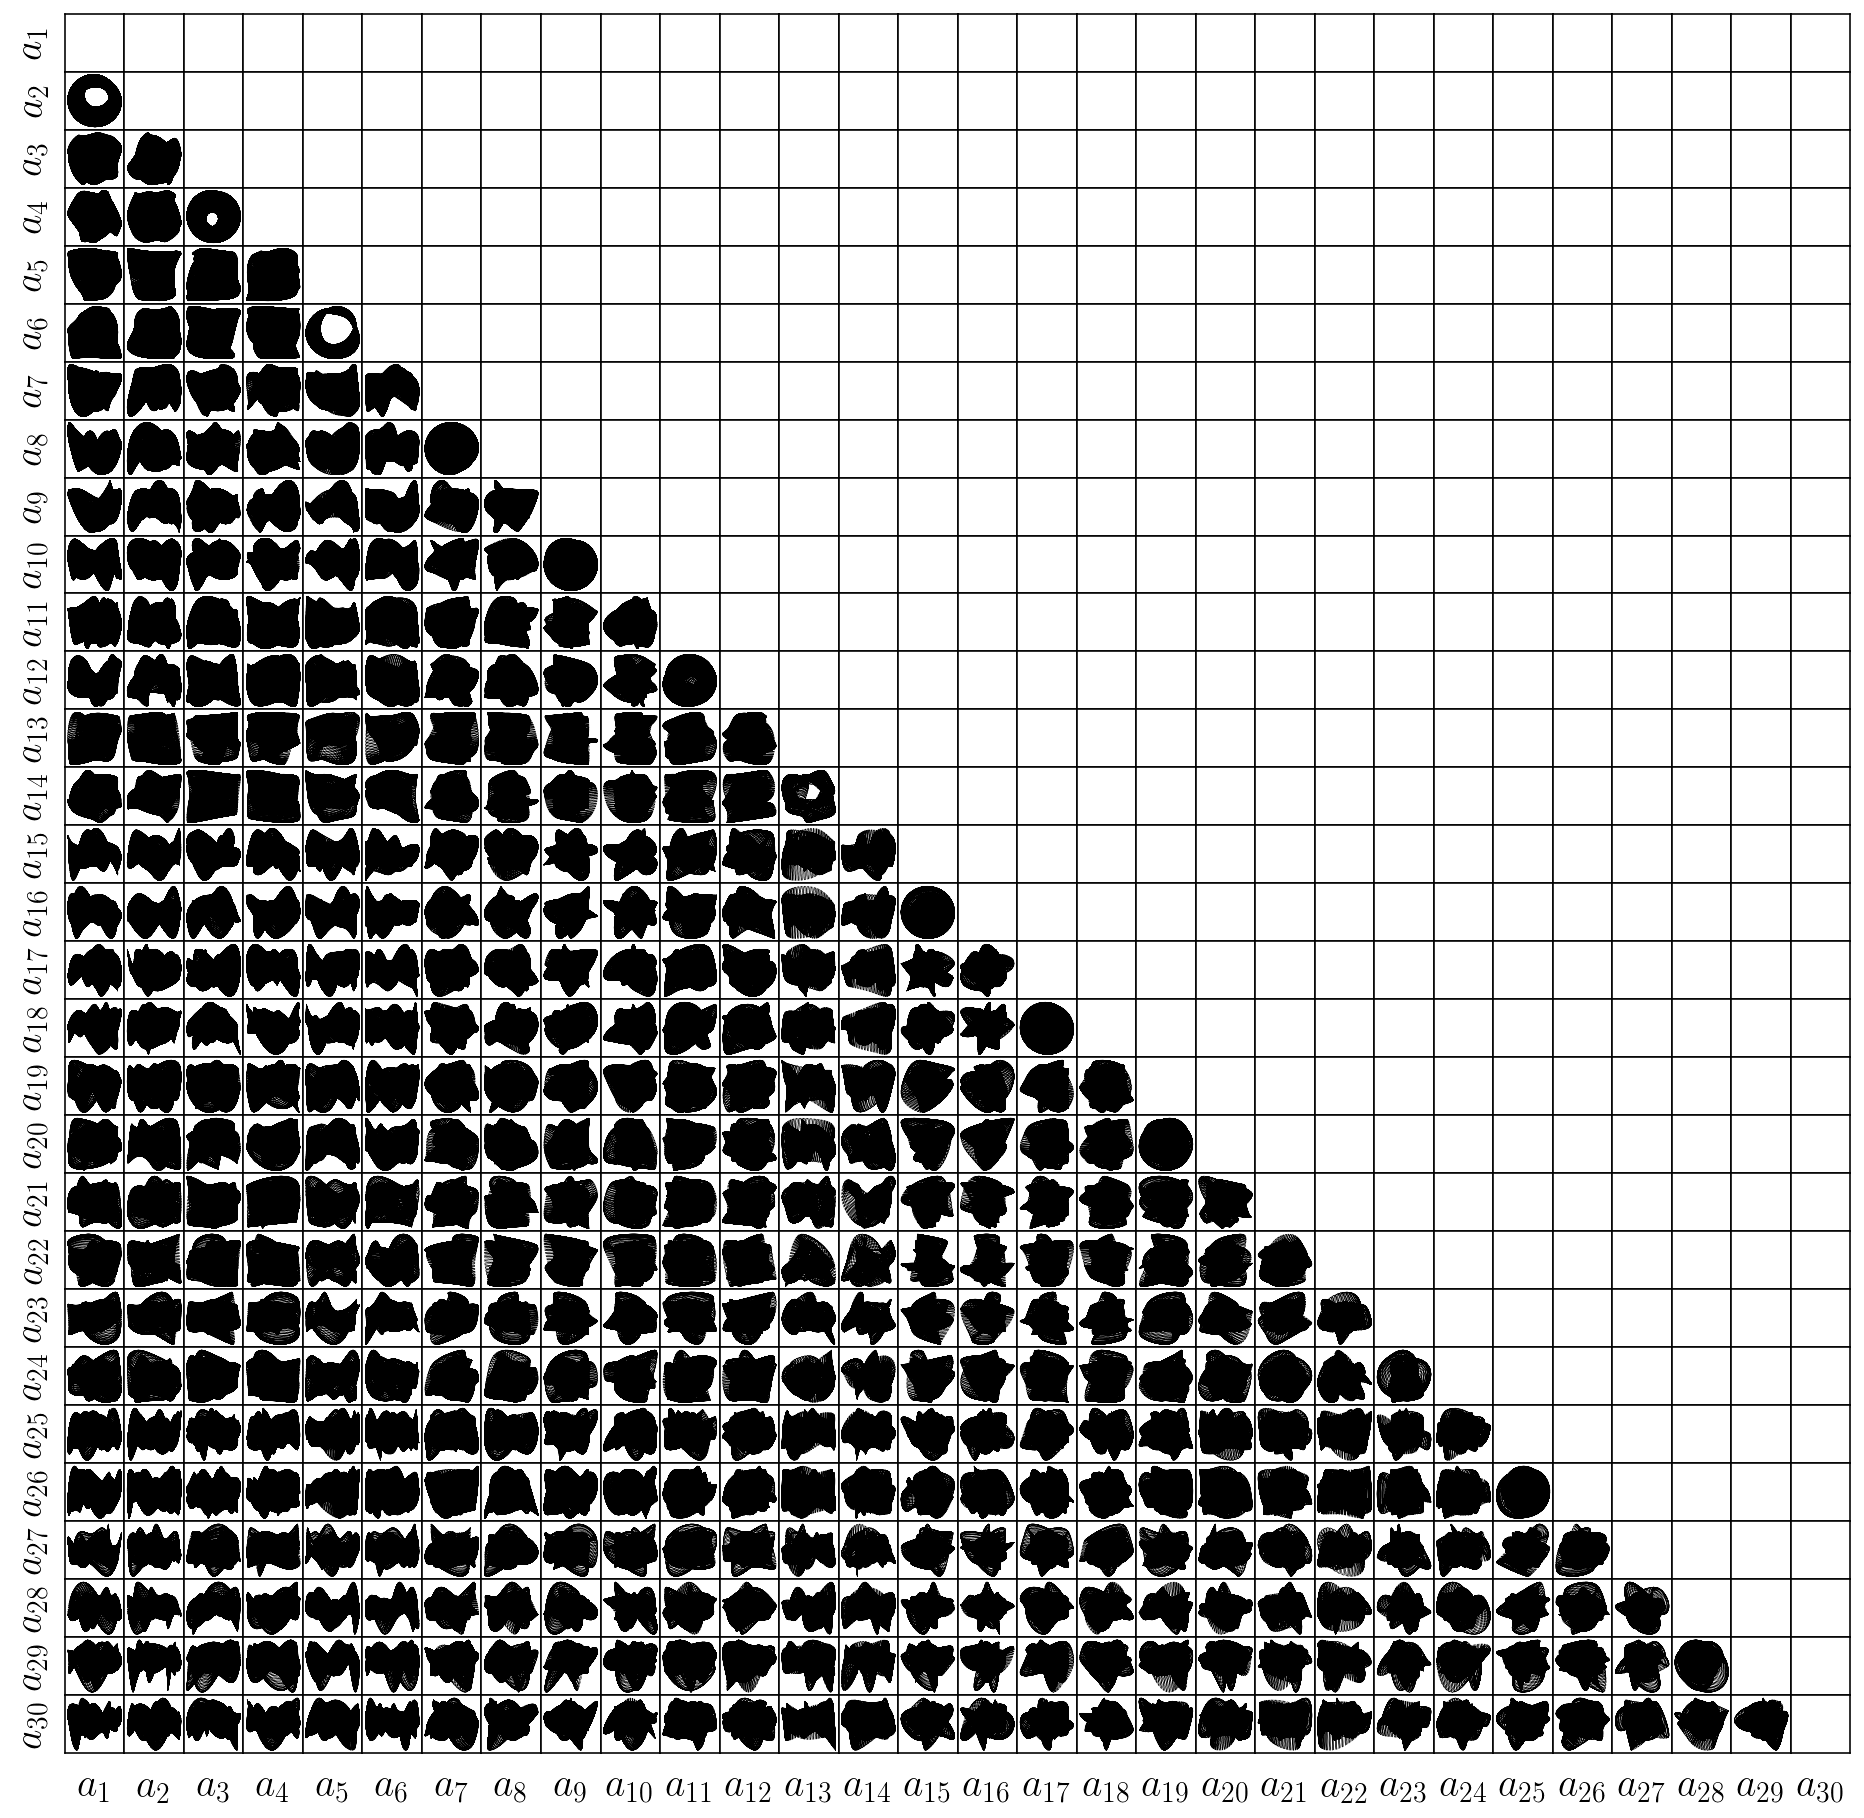

In [16]:
nmodes = 30

fig, ax = plt.subplots(nmodes, nmodes, figsize=(16, 16))
for i in range(nmodes):
    for j in range(nmodes):
        ax[j, i].set_xticklabels('')
        ax[j, i].set_yticklabels('')
        ax[j, i].tick_params('both', length=0)
        
        if j==nmodes-1:
            ax[j, i].set_xlabel(r'$a_{{{0}}}$'.format(i+1))
        if i==0:
            ax[j, i].set_ylabel(r'$a_{{{0}}}$'.format(j+1))
        
        if j > i:
            ax[j, i].plot(a[:, i], a[:, j], 'k', lw=0.1)
            
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

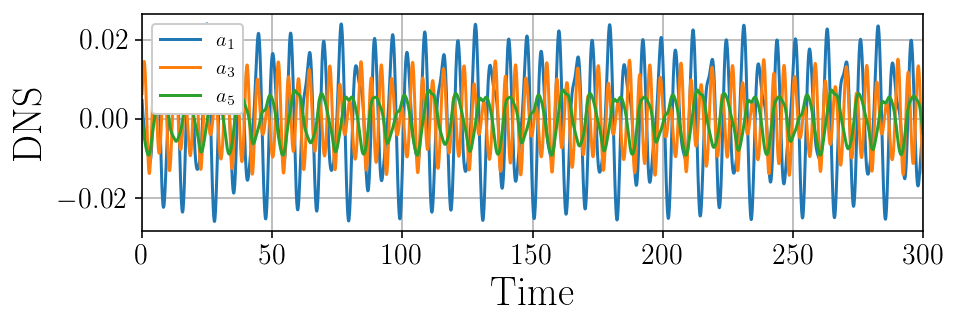

In [17]:
plt_idx = np.nonzero(t < 300)[0]
plt.figure(figsize=(7, 2))
for i in [0, 2, 4]:
    plt.plot(t[plt_idx], a[plt_idx, i])
plt.xlim([0, 300])
plt.ylabel('DNS')
plt.xlabel('Time')
plt.legend(['$a_1$', '$a_3$', r'$a_5$'],
           loc=2, fancybox=True, framealpha=1, fontsize=10)
plt.grid()
plt.show()

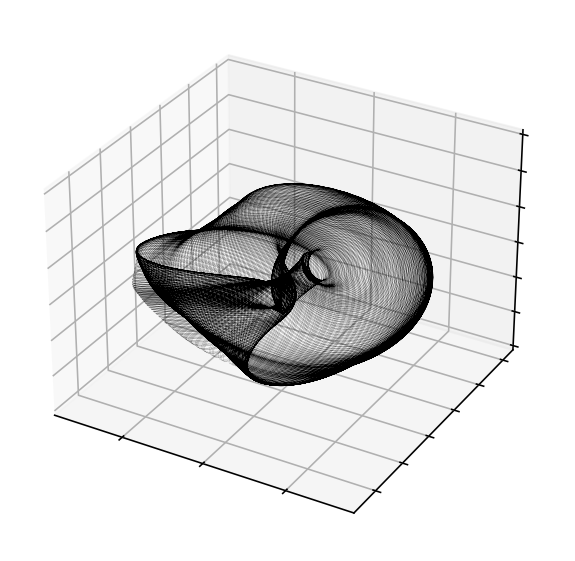

In [18]:
fig = plt.figure(figsize=(4.5, 4))
ax = plt.axes(projection='3d')

x, y, z = cls.utils.complex2torus(a[:, 0]+1j*a[:, 1], a[:, 2]+1j*a[:, 3])
ax.plot(x, y, z, 'k', lw=0.05)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_zlim([-0.03, .03])

plt.tight_layout()
# ax.set_axis_off()
#plt.savefig('./figs/torus.png', transparent=True)
plt.show()

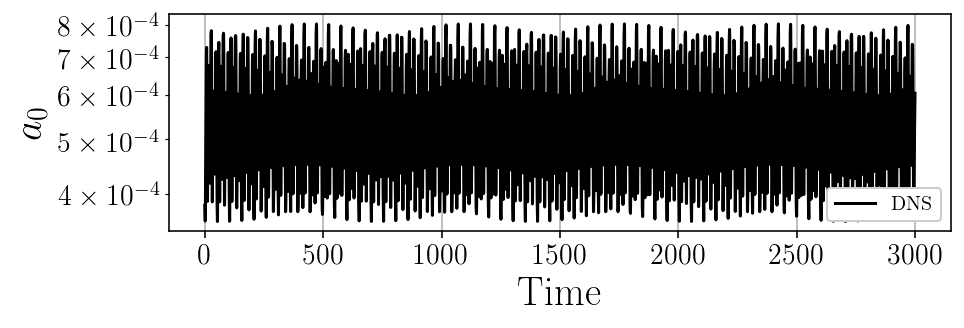

In [19]:
E_dns = np.sum(a**2, 1)

plt.figure(figsize=(7, 2))
plt.plot(t, E_dns, 'k', label='DNS')

# plt.xlim([0, 1000])
# plt.ylim([0, 3e2])
plt.gca().set_yscale('log')
plt.ylabel('$a_0$')
plt.xlabel('Time')
plt.legend(loc=0, fancybox=True, framealpha=1, fontsize=10)
plt.grid()

plt.show()

# Plot leading POD modes

In [20]:
r = 12
flow.load_modes_and_grads(r+1, pres_grad=False, vort=True)

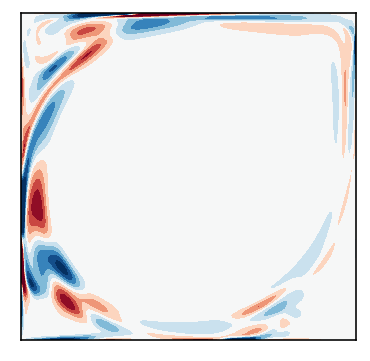

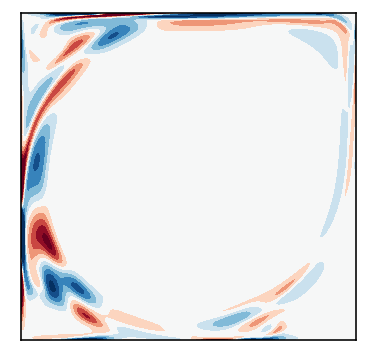

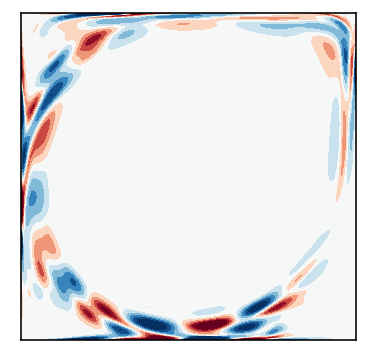

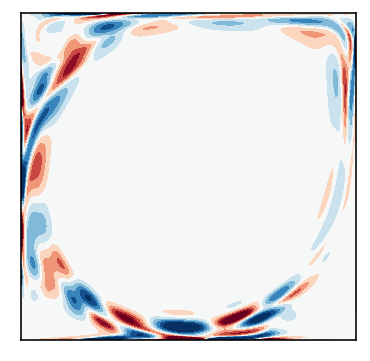

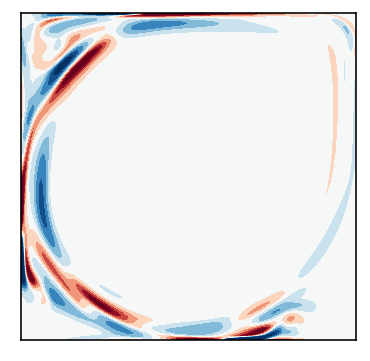

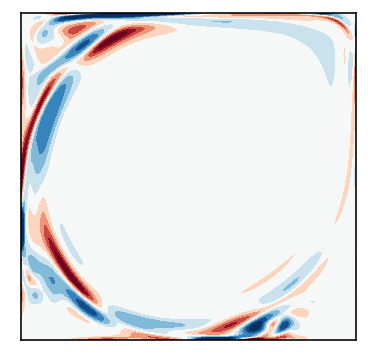

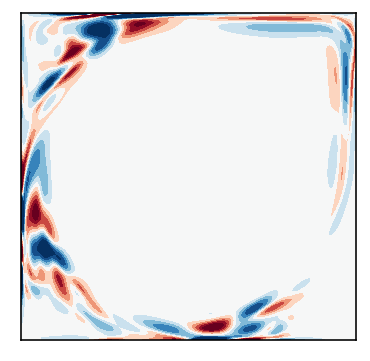

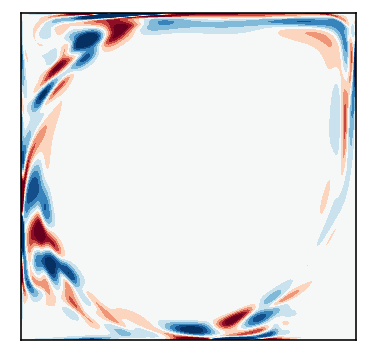

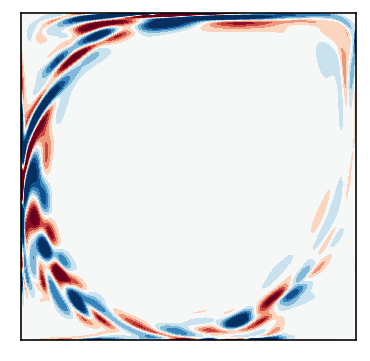

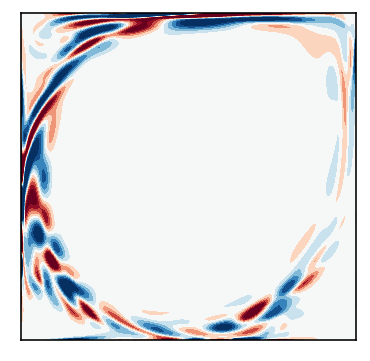

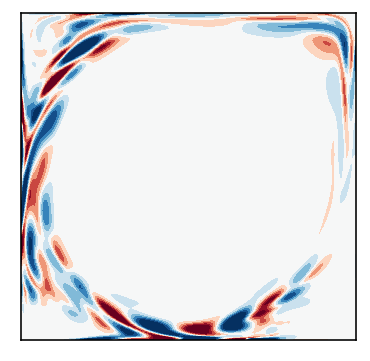

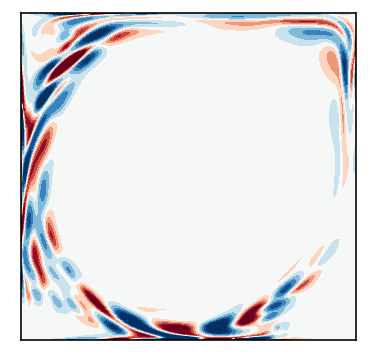

In [23]:
clim = (-50, 50)
for i in range(1, flow.U.shape[1]):
    plt.figure(figsize=(3, 3))
    flow.plot_field(flow.interp(flow.vort[:, i]), clim=clim)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.show()